In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
%matplotlib inline

In [3]:
#import military spending data
military_data=pd.read_excel("SIPRI-Milex-data-1949-2016.xlsx",sheetname="Current USD", skiprows=5,skip_footer=6)
military_data.columns

Index(['Country',   'Notes',      1949,      1950,      1951,      1952,
            1953,      1954,      1955,      1956,      1957,      1958,
            1959,      1960,      1961,      1962,      1963,      1964,
            1965,      1966,      1967,      1968,      1969,      1970,
            1971,      1972,      1973,      1974,      1975,      1976,
            1977,      1978,      1979,      1980,      1981,      1982,
            1983,      1984,      1985,      1986,      1987,      1988,
            1989,      1990,      1991,      1992,      1993,      1994,
            1995,      1996,      1997,      1998,      1999,      2000,
            2001,      2002,      2003,      2004,      2005,      2006,
            2007,      2008,      2009,      2010,      2011,      2012,
            2013,      2014,      2015,      2016],
      dtype='object')

In [4]:
#take a look at the raw data first 
military_data.head(10)


,Country,Notes,1949,1950,1951,1952,1953,1954,1955,1956,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
3,Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,...,639.137,1100.07,. .,. .,. .,2987.41,3964.69,3755.66,. .,. .
4,Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03
5,Tunisia,NaN,xxx,xxx,xxx,xxx,xxx,xxx,xxx,3.71429,...,490.651,578.911,564.776,571.189,715.24,681.226,759.359,908.357,979.494,975.938
6,Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,4,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,2032.43,3163.59,3311.19,3500.79,3639.5,4144.63,6090.75,6841.86,3608.29,2824.26
8,Benin,NaN,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,. .,64.7246,. .,. .,. .,78.2231,86.0032,92.9907,90.8961,98.1366
9,Botswana,NaN,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,306.451,332.4,330.147,348.673,363.324,326.874,306.439,346.281,383.74,514.463


In [5]:
#start to modify the structure and format of the data
#set country to index
militaryS=military_data.set_index(["Country"])
militaryS

,Notes,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,...,639.137,1100.07,. .,. .,. .,2987.41,3964.69,3755.66,. .,. .
Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,35.402,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03
Tunisia,NaN,xxx,xxx,xxx,xxx,xxx,xxx,xxx,3.71429,6.41115,...,490.651,578.911,564.776,571.189,715.24,681.226,759.359,908.357,979.494,975.938
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,4,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,2032.43,3163.59,3311.19,3500.79,3639.5,4144.63,6090.75,6841.86,3608.29,2824.26
Benin,NaN,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,. .,64.7246,. .,. .,. .,78.2231,86.0032,92.9907,90.8961,98.1366


In [6]:
#remove notes column
militaryS=militaryS.drop(["Notes"],axis=1)
militaryS

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
Libya,xxx,xxx,. .,. .,. .,. .,. .,. .,. .,. .,...,639.137,1100.07,. .,. .,. .,2987.41,3964.69,3755.66,. .,. .
Morocco,xxx,xxx,xxx,xxx,xxx,xxx,xxx,23.7143,35.402,41.6923,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03
Tunisia,xxx,xxx,xxx,xxx,xxx,xxx,xxx,3.71429,6.41115,9.52381,...,490.651,578.911,564.776,571.189,715.24,681.226,759.359,908.357,979.494,975.938
Sub-Saharan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,2032.43,3163.59,3311.19,3500.79,3639.5,4144.63,6090.75,6841.86,3608.29,2824.26
Benin,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,. .,64.7246,. .,. .,. .,78.2231,86.0032,92.9907,90.8961,98.1366


In [7]:
#replace Na, xxx, .. with 0, so it will be more convenient to sort values and compare 
militaryS=militaryS.fillna(0)



In [8]:
militaryS=militaryS.replace("xxx","0 ")

In [9]:
militaryS=militaryS.replace(". .","0 ")


In [10]:
militaryS

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,
Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
North Africa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,3945.82,5172.34,5280.59,5671.31,8652.24,9326.29,10161.6,9724.38,10412.7,10217.1
Libya,0,0,0,0,0,0,0,0,0,0,...,639.137,1100.07,0,0,0,2987.41,3964.69,3755.66,0,0
Morocco,0,0,0,0,0,0,0,23.7143,35.402,41.6923,...,2408.35,2944.96,3055.07,3160.8,3342.7,3402.7,4065.55,4048.61,3268.36,3327.03
Tunisia,0,0,0,0,0,0,0,3.71429,6.41115,9.52381,...,490.651,578.911,564.776,571.189,715.24,681.226,759.359,908.357,979.494,975.938
Sub-Saharan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,2032.43,3163.59,3311.19,3500.79,3639.5,4144.63,6090.75,6841.86,3608.29,2824.26
Benin,0,0,0,0,0,0,0,0,0,0,...,0,64.7246,0,0,0,78.2231,86.0032,92.9907,90.8961,98.1366


In [11]:
#top 10 countries among military spending in 2012
m2012=pd.to_numeric(militaryS[2012]).sort_values(ascending=False).head(10)
m2012


Country
USA                   684780.000000
China, P.R.           157390.377246
Russian Federation     81469.399931
France                 60035.153811
Japan                  60011.530195
UK                     58495.656721
Saudi Arabia           56497.866667
India                  47216.920048
Germany                46470.870905
Brazil                 33987.005074
Name: 2012, dtype: float64

In [12]:
#The top 10 countries only with names in a list
#This prepares for the next plot function for x label with different countries 
m2012Country=m2012.index.values.tolist()
m2012Country


['USA',
 'China, P.R.',
 'Russian Federation',
 'France',
 'Japan',
 'UK',
 'Saudi Arabia',
 'India',
 'Germany',
 'Brazil']

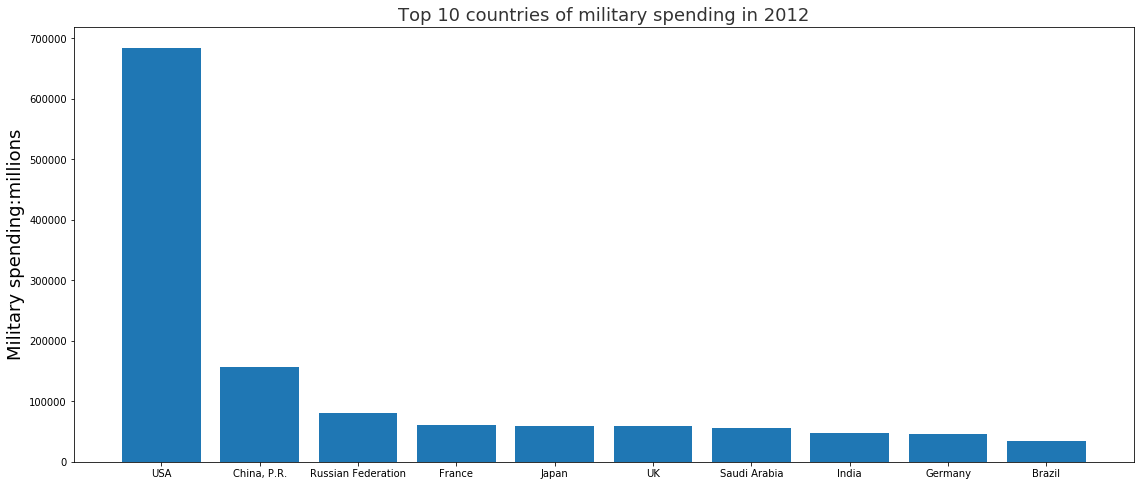

In [13]:
#A fucntion to do barchart for top 10 countries of military spending in different years 
def plot1(country,countryValues,year):
    plt.figure(figsize=(19,8))
    x = np.array([0,1,2,3,4,5,6,7,8,9])
    plt.title("Top 10 countries of military spending in {}".format(year), alpha=0.8,fontsize=18)
    plt.ylabel("Military spending:millions",fontsize=18)
    plt.xticks(x,country)
    plt.bar(x,countryValues.values)
    plt.show()
    
top2012=plot1(m2012Country,m2012, 2012)    

In [14]:
#top 10 countires in 2013
m2013=pd.to_numeric(militaryS[2013]).sort_values(ascending=False).head(10)
m2013


Country
USA                   639704.000000
China, P.R.           179880.451358
Russian Federation     88352.896464
Saudi Arabia           67020.000000
France                 62417.099178
UK                     56861.759588
Japan                  49023.932407
India                  47403.528801
Germany                45930.540563
Korea, South           34354.112435
Name: 2013, dtype: float64

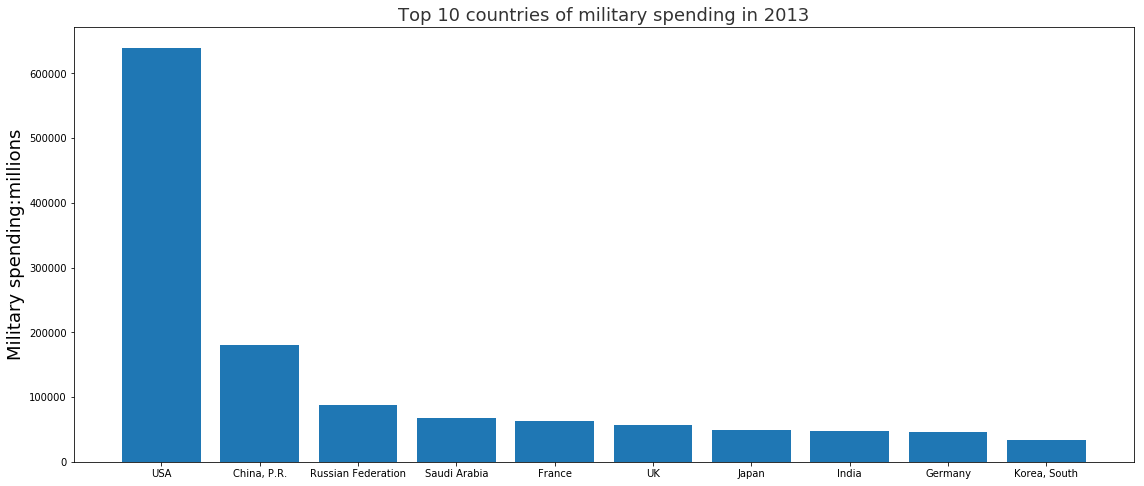

In [15]:
m2013Country=m2013.index.values.tolist()
top2013=plot1(m2013Country,m2013, 2013) 


In [16]:
#top 10 countires in 2014
m2014=pd.to_numeric(militaryS[2014]).sort_values(ascending=False).head(10)
m2014


Country
USA                   609914.000000
China, P.R.           200772.203840
Russian Federation     84696.504653
Saudi Arabia           80762.400000
France                 63613.569143
UK                     59182.858554
India                  50914.108341
Japan                  46634.511062
Germany                46102.673010
Korea, South           37286.221699
Name: 2014, dtype: float64

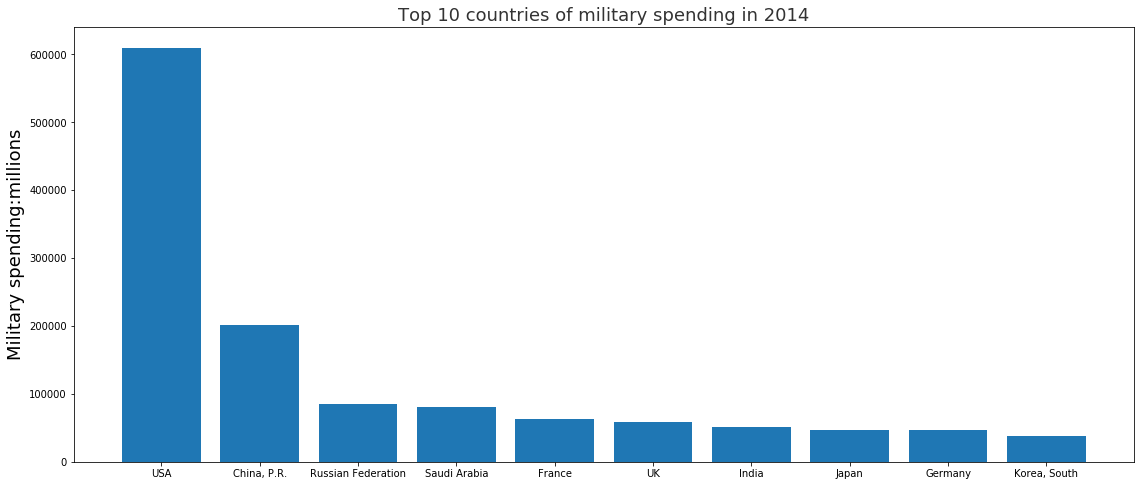

In [17]:
m2014Country=m2014.index.values.tolist()
top2014=plot1(m2014Country,m2014, 2014)

In [18]:
#top 10 countires in 2015
m2015=pd.to_numeric(militaryS[2015]).sort_values(ascending=False).head(10)
m2015


Country
USA                   596009.639000
China, P.R.           214093.069946
Saudi Arabia           87185.866667
Russian Federation     66418.708184
France                 55342.131529
UK                     53862.185493
India                  51295.483754
Japan                  41103.226466
Germany                39812.576245
Korea, South           36432.680683
Name: 2015, dtype: float64

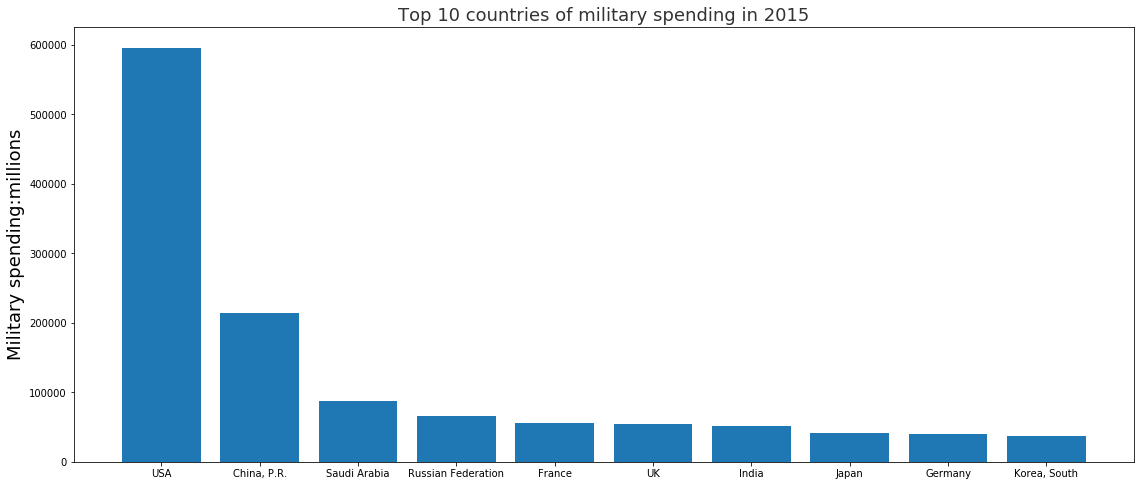

In [19]:
m2015Country=m2015.index.values.tolist()
top2015=plot1(m2015Country,m2015, 2015)

In [20]:
#top 10 countires in 2016 and the plot 
m2016=pd.to_numeric(militaryS[2016]).sort_values(ascending=False).head(10)
m2016

Country
USA                   611186.443000
China, P.R.           215175.930112
Russian Federation     69245.309461
Saudi Arabia           63672.800000
India                  55923.169804
France                 55745.475500
UK                     48252.518238
Japan                  46126.327551
Germany                41067.464816
Korea, South           36776.733458
Name: 2016, dtype: float64

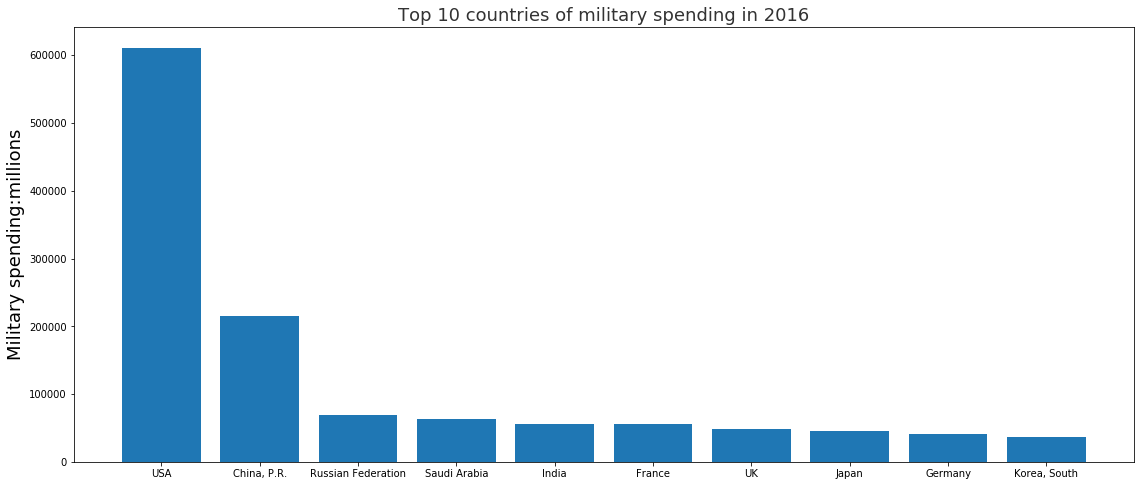

In [21]:
m2016Country=m2016.index.values.tolist()
top2016=plot1(m2016Country,m2016, 2016)

In [22]:
print(m2012[0:1], m2013[0:1], m2014[0:1], m2015[0:1], m2016[0:1])

Country
USA    684780.0
Name: 2012, dtype: float64 Country
USA    639704.0
Name: 2013, dtype: float64 Country
USA    609914.0
Name: 2014, dtype: float64 Country
USA    596009.639
Name: 2015, dtype: float64 Country
USA    611186.443
Name: 2016, dtype: float64


In [23]:
#Join those top 10 countries into one for five years data for 2012-2015
#It is easy to tell that the only year for the five years that Korea South is not in top 10 is 2012 
#Brazil is only in top 10 in 2012 over 2012-2016 
#Other Countries are always in top 10 from 2012 to 2016
m5=pd.concat([m2012,m2013,m2014,m2015,m2016],axis=1)
m5

,2012,2013,2014,2015,2016
Brazil,33987.005074,NaN,NaN,NaN,NaN
"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112
France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500
Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816
India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804
Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551
"Korea, South",NaN,34354.112435,37286.221699,36432.680683,36776.733458
Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461
Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000
UK,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238


In [24]:
#Brazil values from 2013 to 2016 are missing because brazil is not in top ten from 2013 to 2016
#For the integrity of the data, it is better to find values for Brazil
mbrazil=militaryS[(militaryS.index.values=="Brazil")]
mb=mbrazil.iloc[:,64:70]
mb

,2013,2014,2015,2016
Country,,,,
Brazil,32874.8,32659.6,24617.7,23675.8


In [25]:
#replace missing Brazil value
m5[2013][0]=mb.values[0][0]
m5[2014][0]=mb.values[0][1]
m5[2015][0]=mb.values[0][2]
m5[2016][0]=mb.values[0][3]
m5


,2012,2013,2014,2015,2016
Brazil,33987.005074,32874.787231,32659.614241,24617.701683,23675.806667
"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112
France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500
Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816
India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804
Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551
"Korea, South",NaN,34354.112435,37286.221699,36432.680683,36776.733458
Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461
Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000
UK,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238


In [26]:
#It is the same for Korea in 2012, so find the data for Korea
mk=militaryS[(militaryS.index.values=="Korea, South")]
mk=mk.iloc[:,63:64]
m5[2012][6]=mk.values[0][0]
m5


,2012,2013,2014,2015,2016
Brazil,33987.005074,32874.787231,32659.614241,24617.701683,23675.806667
"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112
France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500
Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816
India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804
Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551
"Korea, South",31951.760810,34354.112435,37286.221699,36432.680683,36776.733458
Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461
Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000
UK,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238


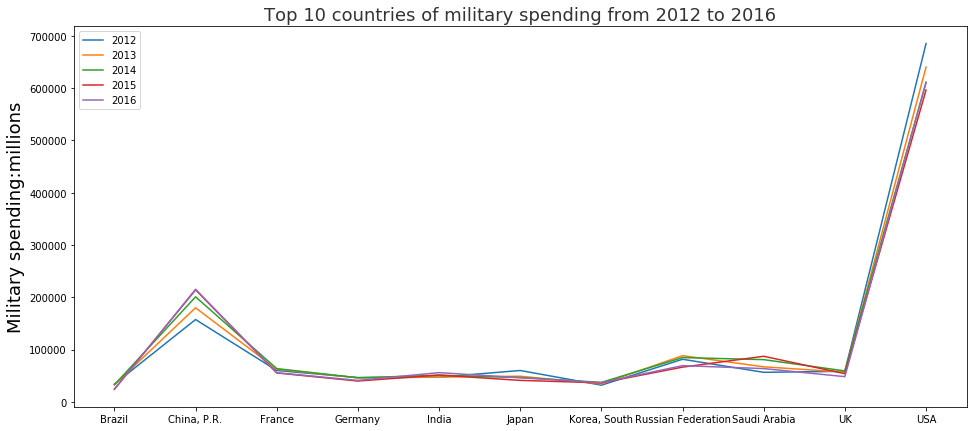

In [27]:
#use line chart to compare military spending for the top ten countries from 2012 to 2016
m5country=m5.index.values
years=["2012","2013","2014","2015","2016"]
plt.figure(figsize=(16,7))
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
plt.title("Top 10 countries of military spending from 2012 to 2016", alpha=0.8,fontsize=18)
plt.ylabel("Military spending:millions",fontsize=18)
plt.xticks(x,m5country)
plt.plot(x,m5.values)
plt.legend(years)
plt.show()        
        


In [28]:
#load data for gdp
gdp_data=pd.read_csv("gdp.csv",skiprows=4)
gdp_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [29]:
#modify country names to match it with military data and drop useless column
gdp_data=gdp_data.drop(['Unnamed: 61'],axis=1)
gdp_data=gdp_data.replace("Korea, Rep.","Korea, South")
gdp_data=gdp_data.replace("China","China, P.R.")
gdp_data=gdp_data.replace("United Kingdom","UK")
gdp_data=gdp_data.replace("United States","USA")
gdp_data.head()



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.970299e+10,1.946902e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,8.963316e+10
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139037e+10,1.192689e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN,NaN


In [30]:
#Created a list contains top 10 country names to search those countries'value in GDP data
#Since Brazil is only in top 10 countries in 2012, here I decided to exclued Brazil for the follwing analysis
country_list=["China, P.R.","USA","UK","France","Germany","India","Japan","Korea, South","Russian Federation","Saudi Arabia"]
gdp_data10=gdp_data[gdp_data["Country Name"].isin(country_list)]
gdp_data10=gdp_data10.set_index(["Country Name"])
gdp_data10
#show the gdp of top 10 countries in military spending  
#can also use gdp_data1216= gdp_data10.iloc[:,55:51] to select
gdp_data1216=pd.concat([gdp_data10["2012"],gdp_data10["2013"],gdp_data10["2014"],gdp_data10["2015"],gdp_data10["2016"]],axis=1)
gdp_data1216


,2012,2013,2014,2015,2016
Country Name,,,,,
"China, P.R.",8.560547e+12,9.607224e+12,1.048237e+13,1.106466e+13,1.119915e+13
Germany,3.543984e+12,3.752514e+12,3.879277e+12,3.363600e+12,3.466757e+12
France,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12,2.465454e+12
UK,2.646003e+12,2.719509e+12,2.998834e+12,2.861091e+12,2.618886e+12
India,1.827638e+12,1.856722e+12,2.035393e+12,2.111751e+12,2.263523e+12
Japan,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12,4.939384e+12
"Korea, South",1.222807e+12,1.305605e+12,1.411334e+12,1.382764e+12,1.411246e+12
Russian Federation,2.170144e+12,2.230625e+12,2.063662e+12,1.365865e+12,1.283162e+12
Saudi Arabia,7.359748e+11,7.466471e+11,7.563503e+11,6.542699e+11,6.464384e+11


In [31]:
#GDP and Military spending in 2015
gdp2015=gdp_data10["2015"]
C2015=pd.concat([gdp2015,m2015],axis=1)
C2015.columns=["GDP","MILITARY"]
#The unit for military spending is millions but the gdp does not use millions,midify the value in military spending 
C2015m=C2015.MILITARY.values*1000000
C2015=C2015.replace(C2015.MILITARY.values,C2015m)
C2015


,GDP,MILITARY
"China, P.R.",1.106466e+13,2.140931e+11
France,2.433562e+12,5.534213e+10
Germany,3.363600e+12,3.981258e+10
India,2.111751e+12,5.129548e+10
Japan,4.383076e+12,4.110323e+10
"Korea, South",1.382764e+12,3.643268e+10
Russian Federation,1.365865e+12,6.641871e+10
Saudi Arabia,6.542699e+11,8.718587e+10
UK,2.861091e+12,5.386219e+10
USA,1.803665e+13,5.960096e+11


In [32]:
#create a fuction to get the gdp and military data for every year 
def gdp_military(year):
    y=str(year)
    gdpy=gdp_data10[y]
    gdpy
    my=m5[year]
    C=pd.concat([gdpy,my],axis=1)
    C.columns=["GDP","MILITARY"]
    Cm=C.MILITARY.values*1000000
    C2=C.replace(C.MILITARY.values,Cm)
    #to exclued Brazil
    return C2[1:11]
    

gdp_military(2016)    

,GDP,MILITARY
"China, P.R.",1.119915e+13,2.151759e+11
France,2.465454e+12,5.574548e+10
Germany,3.466757e+12,4.106746e+10
India,2.263523e+12,5.592317e+10
Japan,4.939384e+12,4.612633e+10
"Korea, South",1.411246e+12,3.677673e+10
Russian Federation,1.283162e+12,6.924531e+10
Saudi Arabia,6.464384e+11,6.367280e+10
UK,2.618886e+12,4.825252e+10
USA,1.856910e+13,6.111864e+11


In [33]:
gdp_military(2015)  

,GDP,MILITARY
"China, P.R.",1.106466e+13,2.140931e+11
France,2.433562e+12,5.534213e+10
Germany,3.363600e+12,3.981258e+10
India,2.111751e+12,5.129548e+10
Japan,4.383076e+12,4.110323e+10
"Korea, South",1.382764e+12,3.643268e+10
Russian Federation,1.365865e+12,6.641871e+10
Saudi Arabia,6.542699e+11,8.718587e+10
UK,2.861091e+12,5.386219e+10
USA,1.803665e+13,5.960096e+11


In [34]:
gdp_military(2014)  

,GDP,MILITARY
"China, P.R.",1.048237e+13,2.007722e+11
France,2.849305e+12,6.361357e+10
Germany,3.879277e+12,4.610267e+10
India,2.035393e+12,5.091411e+10
Japan,4.848733e+12,4.663451e+10
"Korea, South",1.411334e+12,3.728622e+10
Russian Federation,2.063662e+12,8.469650e+10
Saudi Arabia,7.563503e+11,8.076240e+10
UK,2.998834e+12,5.918286e+10
USA,1.739310e+13,6.099140e+11


In [35]:
gdp_military(2013)  

,GDP,MILITARY
"China, P.R.",9.607224e+12,1.798805e+11
France,2.808511e+12,6.241710e+10
Germany,3.752514e+12,4.593054e+10
India,1.856722e+12,4.740353e+10
Japan,5.155717e+12,4.902393e+10
"Korea, South",1.305605e+12,3.435411e+10
Russian Federation,2.230625e+12,8.835290e+10
Saudi Arabia,7.466471e+11,6.702000e+10
UK,2.719509e+12,5.686176e+10
USA,1.669152e+13,6.397040e+11


In [36]:
gdp_military(2012)  

,GDP,MILITARY
"China, P.R.",8.560547e+12,1.573904e+11
France,2.681416e+12,6.003515e+10
Germany,3.543984e+12,4.647087e+10
India,1.827638e+12,4.721692e+10
Japan,6.203213e+12,6.001153e+10
"Korea, South",1.222807e+12,3.195176e+10
Russian Federation,2.170144e+12,8.146940e+10
Saudi Arabia,7.359748e+11,5.649787e+10
UK,2.646003e+12,5.849566e+10
USA,1.615526e+13,6.847800e+11


In [37]:
def compare_gdp_military(year):
    gm=gdp_military(year)
    print(gm["GDP"])
    
compare_gdp_military (2012)  

China, P.R.           8.560547e+12
France                2.681416e+12
Germany               3.543984e+12
India                 1.827638e+12
Japan                 6.203213e+12
Korea, South          1.222807e+12
Russian Federation    2.170144e+12
Saudi Arabia          7.359748e+11
UK                    2.646003e+12
USA                   1.615526e+13
Name: GDP, dtype: float64


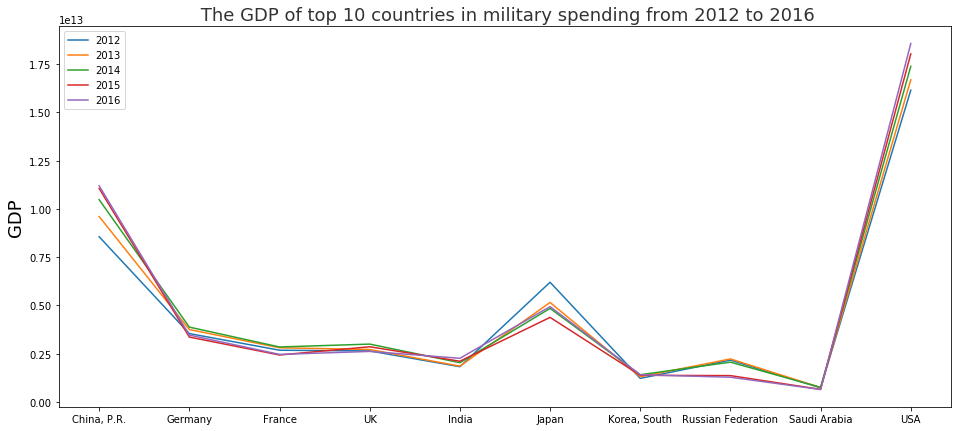

In [38]:
#create a line chart for GDP comparsion of top 10 countries in military spending from 2012 to 2016
gdp_data1216country=gdp_data1216.index.values
years=["2012","2013","2014","2015","2016"]
plt.figure(figsize=(16,7))
x = np.array([0,1,2,3,4,5,6,7,8,9])
plt.title(" The GDP of top 10 countries in military spending from 2012 to 2016", alpha=0.8,fontsize=18)
plt.ylabel("GDP",fontsize=18)
plt.xticks(x,gdp_data1216country)
plt.plot(x,gdp_data1216.values)
plt.legend(years)
plt.show()  

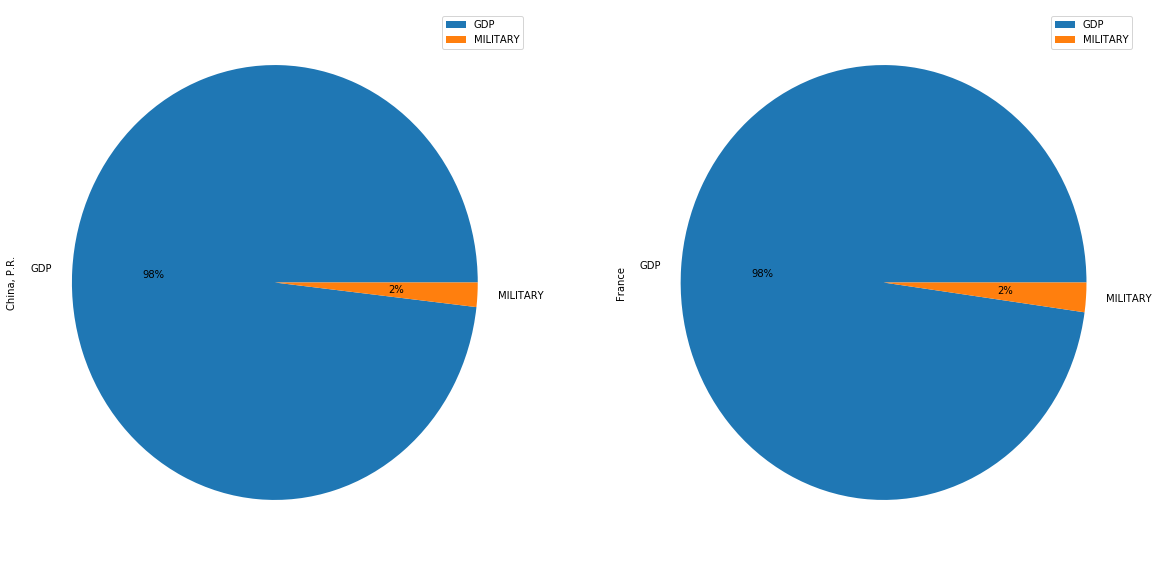

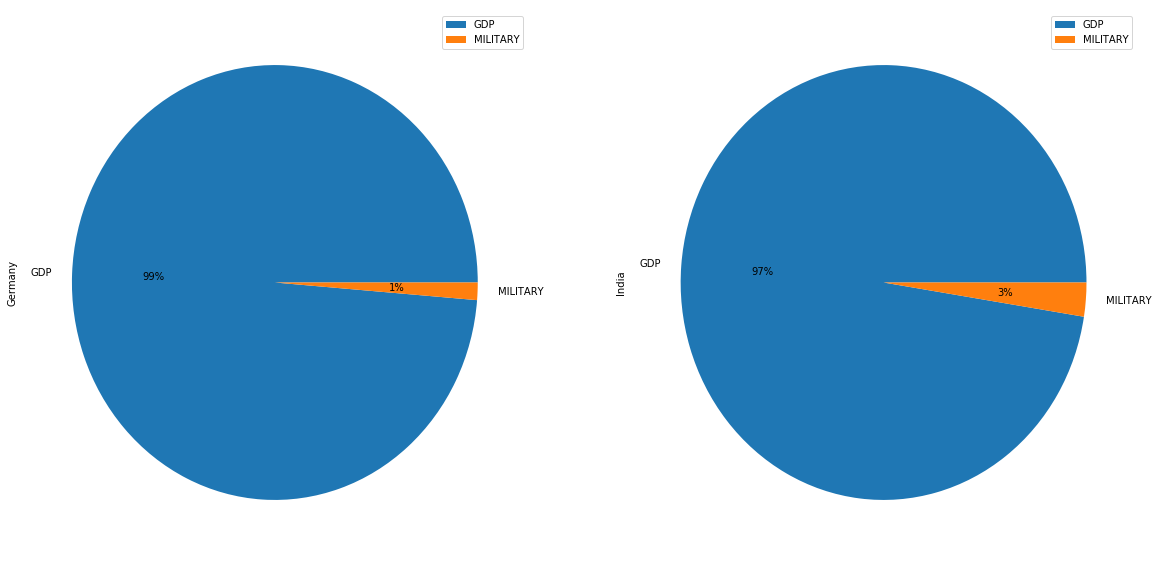

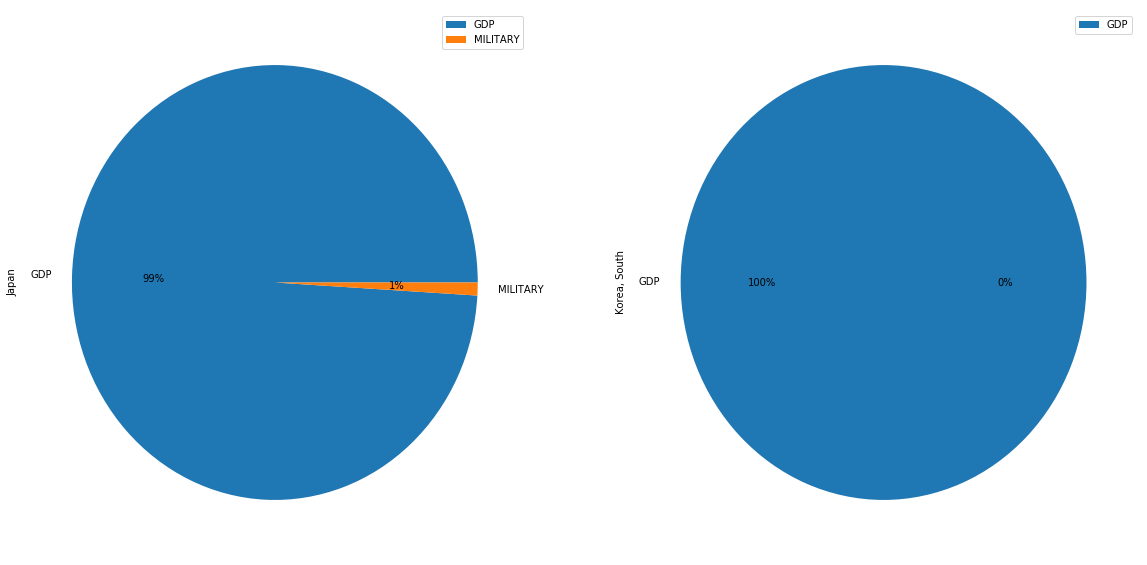

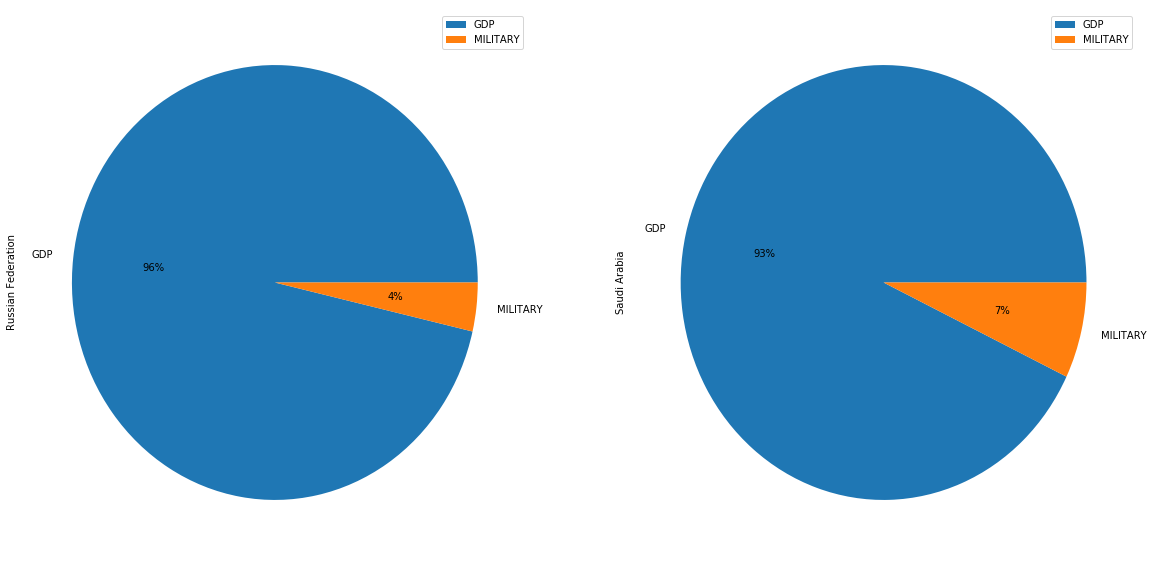

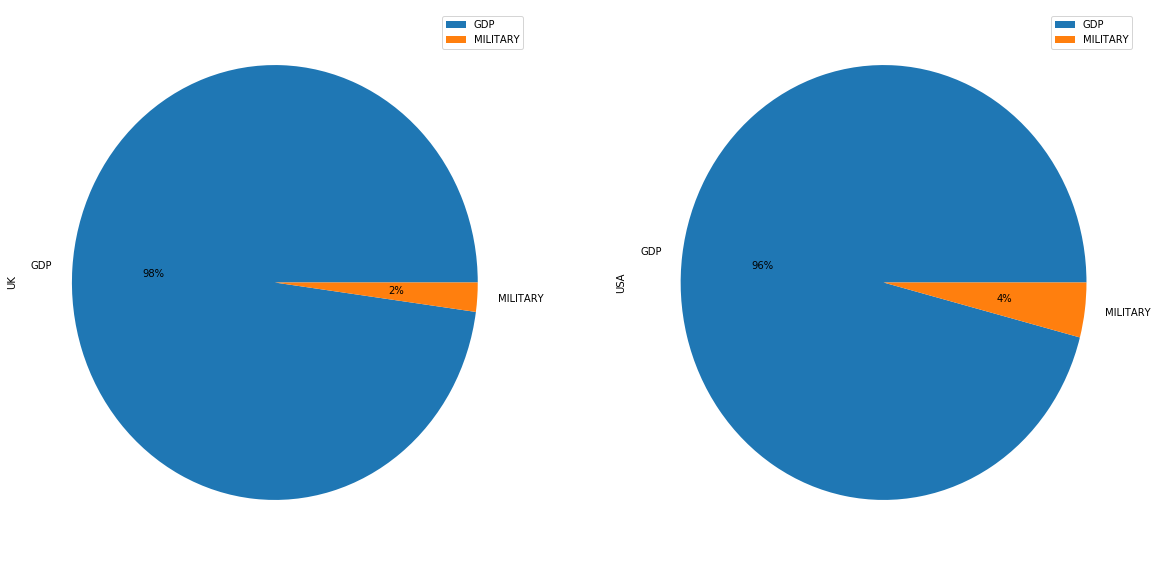

In [39]:
#create a function for pie chart to compare gdp and miitary for each country for waht year your want among 2012-2016
def piegdp_military(year):
    y=str(year)
    gdpy=gdp_data10[y]
    gdpy
    my=pd.to_numeric(militaryS[year]).sort_values(ascending=False).head(10)
    C=pd.concat([gdpy,my],axis=1)
    C.columns=["GDP","MILITARY"]
    Cm=C.MILITARY.values*1000000
    C2=C.replace(C.MILITARY.values,Cm)
    #to exclued Brazil in 2012
    if year ==2012:
         C2=C2[1:11]
    else:
         C2
    C2[0:2].T.plot.pie(subplots=True, figsize=(20, 10),autopct='%.0f%%')
    C2[2:4].T.plot.pie(subplots=True, figsize=(20, 10),autopct='%.0f%%')
    C2[4:6].T.plot.pie(subplots=True, figsize=(20, 10),autopct='%.0f%%')
    C2[6:8].T.plot.pie(subplots=True, figsize=(20, 10),autopct='%.0f%%')
    C2[8:10].T.plot.pie(subplots=True, figsize=(20, 10),autopct='%.0f%%')
    
    

piegdp_military(2012)     

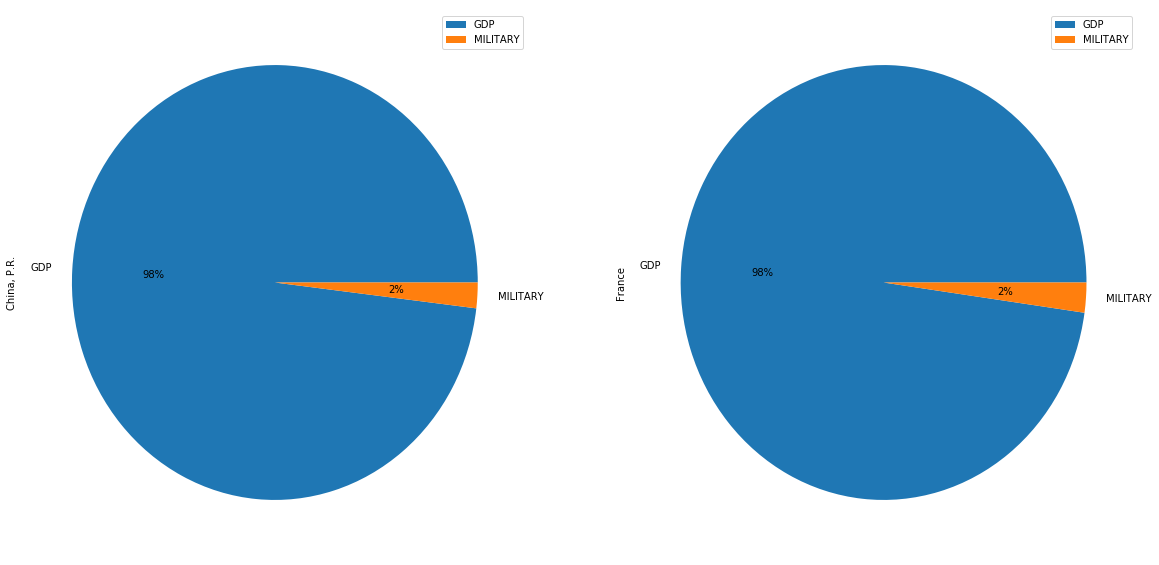

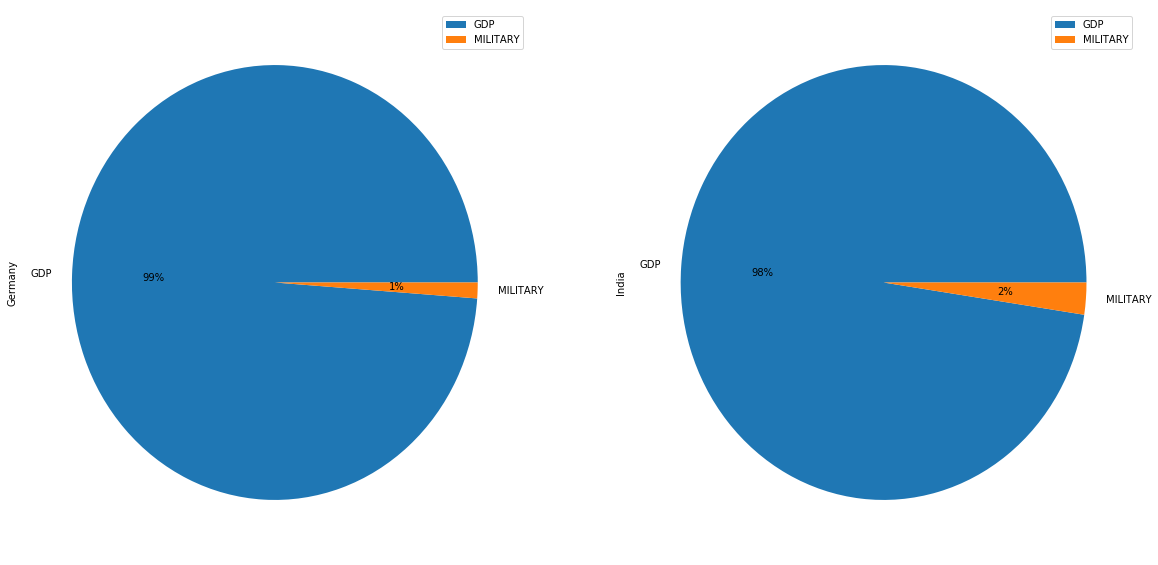

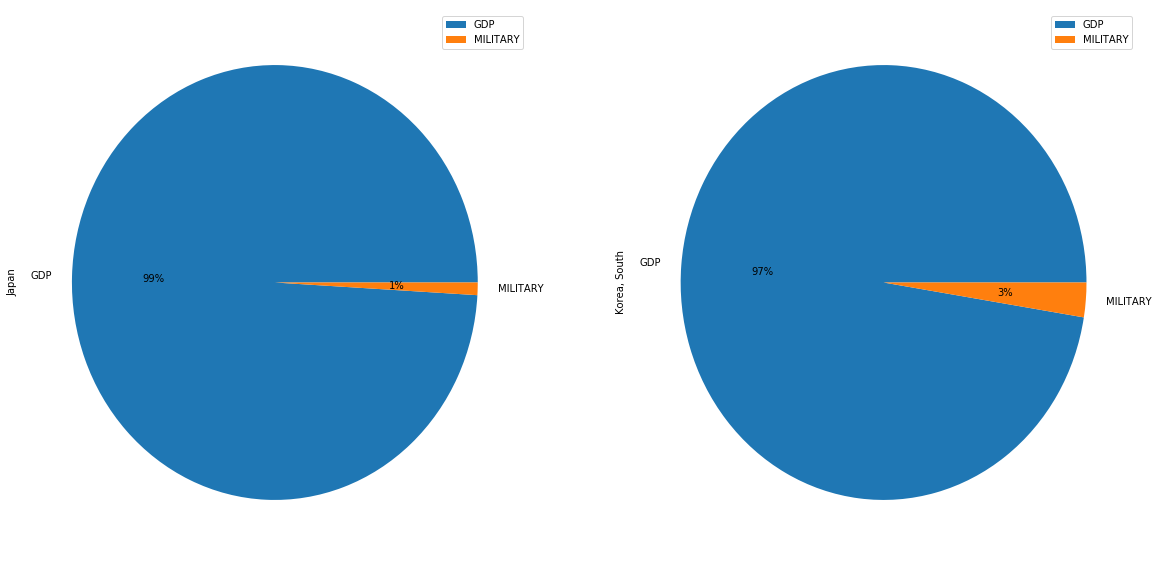

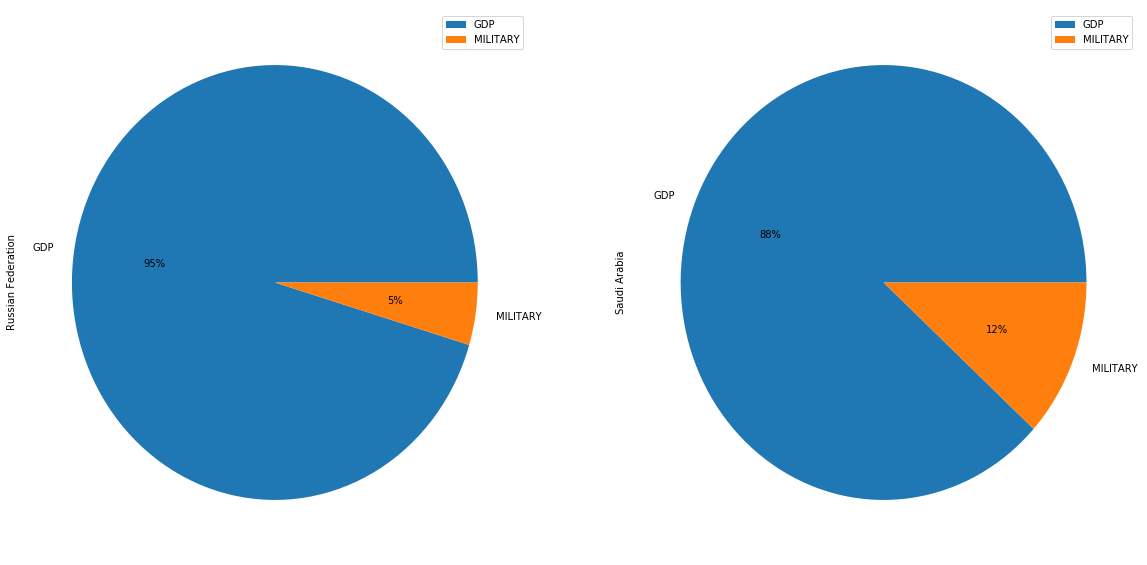

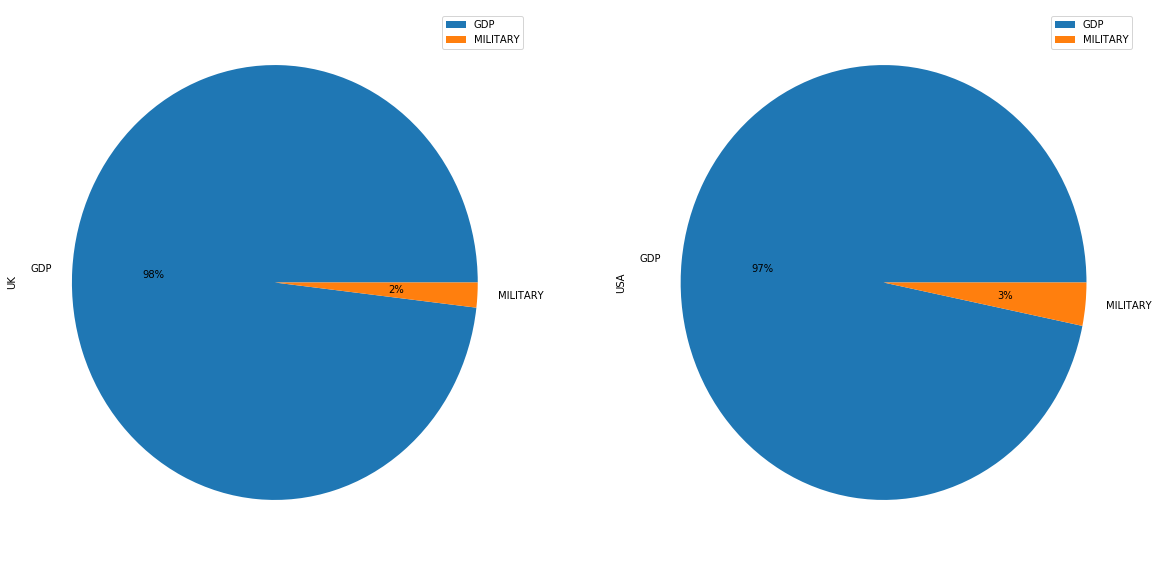

In [40]:
piegdp_military(2015)  

In [41]:
#compare the data to overall military expenditure of 10 countries using percentage
def get_mpct(year):
    w=input("Enter country name: ")
    c=str(w)
    my=m5[year]
    mpct=my[(my.index.values==c)]/my.sum()
    pct=format(mpct.values[0]*100,'.2f')
    return "{}'s military spending accounts for {} percent among overall ten countries in {}".format(c,pct,year) 

get_mpct(2015)    

Enter country name: UK


"UK's military spending accounts for 4.25 percent among overall ten countries in 2015"

In [45]:
get_mpct(2016)

Enter country name: UK


"UK's military spending accounts for 3.81 percent among overall ten countries in 2016"

In [42]:
get_mpct(2012)

Enter country name: UK


"UK's military spending accounts for 4.44 percent among overall ten countries in 2012"

In [43]:
get_mpct(2014)

Enter country name: UK


"UK's military spending accounts for 4.51 percent among overall ten countries in 2014"

In [44]:
get_mpct(2013)

Enter country name: UK


"UK's military spending accounts for 4.36 percent among overall ten countries in 2013"

In [42]:
#read population data
population_data=pd.read_csv("population.csv",skiprows=4)
population_data.columns


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')

In [43]:
#change the country names to match previous names
population_data=population_data.replace("Korea, Rep.","Korea, South")
population_data=population_data.replace("China","China, P.R.")
population_data=population_data.replace("United Kingdom","UK")
population_data=population_data.replace("United States","USA")

In [44]:
#check the raw data
population_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,NaN


In [45]:
#modify the data
population_data=population_data.drop(["Country Code"], axis=1)
population_data=population_data.drop(["Indicator Name"], axis=1)
population_data=population_data.drop(["Indicator Code"], axis=1)
population_data=population_data.drop(["Unnamed: 61"], axis=1)

In [46]:
#find population data for previous 10 countries 
#still exclued Brazil 
country_list=["China, P.R.","USA","UK","France","Germany","India","Japan","Korea, South","Russian Federation","Saudi Arabia"]
population1216=population_data[population_data["Country Name"].isin(country_list)]
population1216

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
38,"China, P.R.",667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,774510000.0,...,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
53,Germany,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,76951336.0,77294314.0,...,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,8.266768e+07
75,France,46814237.0,47444751.0,48119649.0,48803680.0,49449403.0,50023774.0,50508717.0,50915456.0,51276054.0,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
79,UK,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,54648500.0,54943600.0,55211700.0,...,6.132246e+07,6.180700e+07,6.227627e+07,6.276636e+07,6.325892e+07,6.370030e+07,6.412823e+07,6.461316e+07,6.512886e+07,6.563724e+07
107,India,449480608.0,458494963.0,467852537.0,477527970.0,487484535.0,497702365.0,508161935.0,518889779.0,529967317.0,...,1.179681e+09,1.197147e+09,1.214270e+09,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09
117,Japan,92500572.0,94943000.0,95832000.0,96812000.0,97826000.0,98883000.0,99790000.0,100725000.0,101061000.0,...,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08
124,"Korea, South",25012374.0,25765673.0,26513030.0,27261747.0,27984155.0,28704674.0,29435571.0,30130983.0,30838302.0,...,4.868364e+07,4.905471e+07,4.930784e+07,4.955411e+07,4.993664e+07,5.019985e+07,5.042889e+07,5.074666e+07,5.101495e+07,5.124571e+07
200,Russian Federation,119897000.0,121236000.0,122591000.0,123960000.0,125345000.0,126745000.0,127468000.0,128196000.0,128928000.0,...,1.428051e+08,1.427424e+08,1.427853e+08,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08
203,Saudi Arabia,4086539.0,4218879.0,4362864.0,4516659.0,4677404.0,4843635.0,5015204.0,5194846.0,5387486.0,...,2.525257e+07,2.594077e+07,2.666149e+07,2.742568e+07,2.823802e+07,2.908636e+07,2.994448e+07,3.077672e+07,3.155714e+07,3.227569e+07
249,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,200706000.0,...,3.012312e+08,3.040940e+08,3.067715e+08,3.093482e+08,3.116634e+08,3.139984e+08,3.162049e+08,3.185635e+08,3.208966e+08,3.231275e+08


In [47]:
#reset index as country 
population1216=population1216.set_index(["Country Name"])
population1216

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
"China, P.R.",667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,774510000.0,796025000.0,...,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
Germany,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,76951336.0,77294314.0,77909682.0,...,8.226637e+07,8.211010e+07,8.190231e+07,8.177693e+07,8.027498e+07,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,8.266768e+07
France,46814237.0,47444751.0,48119649.0,48803680.0,49449403.0,50023774.0,50508717.0,50915456.0,51276054.0,51638260.0,...,6.401623e+07,6.437499e+07,6.470704e+07,6.502751e+07,6.534278e+07,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
UK,52400000.0,52800000.0,53250000.0,53650000.0,54000000.0,54348050.0,54648500.0,54943600.0,55211700.0,55441750.0,...,6.132246e+07,6.180700e+07,6.227627e+07,6.276636e+07,6.325892e+07,6.370030e+07,6.412823e+07,6.461316e+07,6.512886e+07,6.563724e+07
India,449480608.0,458494963.0,467852537.0,477527970.0,487484535.0,497702365.0,508161935.0,518889779.0,529967317.0,541505076.0,...,1.179681e+09,1.197147e+09,1.214270e+09,1.230981e+09,1.247236e+09,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09
Japan,92500572.0,94943000.0,95832000.0,96812000.0,97826000.0,98883000.0,99790000.0,100725000.0,101061000.0,103172000.0,...,1.280010e+08,1.280630e+08,1.280470e+08,1.280700e+08,1.278330e+08,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08
"Korea, South",25012374.0,25765673.0,26513030.0,27261747.0,27984155.0,28704674.0,29435571.0,30130983.0,30838302.0,31544266.0,...,4.868364e+07,4.905471e+07,4.930784e+07,4.955411e+07,4.993664e+07,5.019985e+07,5.042889e+07,5.074666e+07,5.101495e+07,5.124571e+07
Russian Federation,119897000.0,121236000.0,122591000.0,123960000.0,125345000.0,126745000.0,127468000.0,128196000.0,128928000.0,129664000.0,...,1.428051e+08,1.427424e+08,1.427853e+08,1.428494e+08,1.429609e+08,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08
Saudi Arabia,4086539.0,4218879.0,4362864.0,4516659.0,4677404.0,4843635.0,5015204.0,5194846.0,5387486.0,5599628.0,...,2.525257e+07,2.594077e+07,2.666149e+07,2.742568e+07,2.823802e+07,2.908636e+07,2.994448e+07,3.077672e+07,3.155714e+07,3.227569e+07


In [48]:
#select years for 2012-2016
population1216=population1216.iloc[:,52:59]
population1216


,2012,2013,2014,2015,2016
Country Name,,,,,
"China, P.R.",1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09
Germany,8.042582e+07,8.064560e+07,8.098250e+07,8.168661e+07,8.266768e+07
France,6.565979e+07,6.599857e+07,6.633196e+07,6.662407e+07,6.689611e+07
UK,6.370030e+07,6.412823e+07,6.461316e+07,6.512886e+07,6.563724e+07
India,1.263066e+09,1.278562e+09,1.293859e+09,1.309054e+09,1.324171e+09
Japan,1.276290e+08,1.274450e+08,1.272760e+08,1.271410e+08,1.269945e+08
"Korea, South",5.019985e+07,5.042889e+07,5.074666e+07,5.101495e+07,5.124571e+07
Russian Federation,1.432017e+08,1.435069e+08,1.438197e+08,1.440969e+08,1.443424e+08
Saudi Arabia,2.908636e+07,2.994448e+07,3.077672e+07,3.155714e+07,3.227569e+07


In [49]:
def per_person_military (year):
    w=input("Enter country name: ")
    c=str(w)
    my=m5[year]
    mdata=my[(my.index.values==c)]
    y=str(year)
    pdata=population1216[y]
    pdata=pdata[(pdata.index.values==c)]
    #military data should be multiply 1000000 to match the number format with population
    ppm=mdata*1000000/pdata
    PP=round(ppm[0])
    return PP

UKppm2015=per_person_military(2015)    
UKppm2015

Enter country name: UK


827.0

In [50]:
def per_person_gdp(year):
    w=input("Enter country name: ")
    c=str(w)
    y=str(year)
    G=gdp_data1216[y]
    Gdata=G[(G.index.values==c)]
    pdata=population1216[y]
    pdata=pdata[(pdata.index.values==c)]
    ppg=Gdata/pdata
    PP=round(ppg[0])
    return PP

UKppg2015=per_person_gdp(2015)
UKppg2015

Enter country name: UK


43930.0

Enter country name: UK


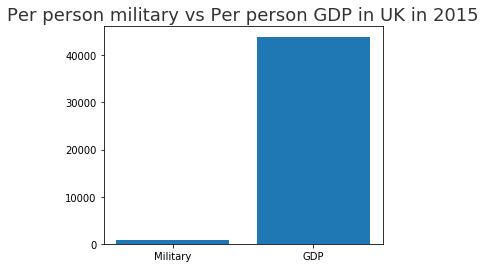

Per person military of UK is 827.0, and it is 43103.0 smaller than its per person GDP which is 43930.0 in 2015


In [51]:
def barchart_pp(year):
    w=input("Enter country name: ")
    c=str(w)
    my=m5[year]
    mdata=my[(my.index.values==c)]
    y=str(year)
    pdata=population1216[y]
    pdata=pdata[(pdata.index.values==c)]
    #military data should be multiply 1000000 to match the format with population
    ppm=mdata*1000000/pdata
    PP1=round(ppm[0])
    G=gdp_data1216[y]
    Gdata=G[(G.index.values==c)]
    ppg=Gdata/pdata
    PP2=round(ppg[0])
    PPP=PP2-PP1
    pplist=[]
    pplist.append(PP1)
    pplist.append(PP2)
    c=str(c)
    plt.figure(figsize=(5,4))
    xlist=["Military","GDP"]
    x = np.array([0,1])
    plt.title("Per person military vs Per person GDP in {} in {}".format(c,y), alpha=0.8,fontsize=18)
    plt.xticks(x,xlist)
    plt.bar(x,pplist)
    plt.show()
    print("Per person military of {} is {}, and it is {} smaller than its per person GDP which is {} in {}".format(c,PP1,PPP,PP2,y))
    
barchart_pp(2015)


In [52]:
def growing():
    w=input("Enter country name: ")
    c=str(w)
    mdata=m5[(m5.index.values==c)]
    yearlist=[2012,2013,2014,2015]
    growth_valuelist=[]
    growth_ratelist=[]
    for i in yearlist:
            growth_value=mdata[i+1]-mdata[i]
            growth_rate=growth_value/mdata[i]
            growth_valuelist.append(growth_value)
            growth_ratelist.append(growth_rate)
    total_value=growth_valuelist[0]+growth_valuelist[1]+growth_valuelist[2]+growth_valuelist[3]
    average_value=total_value/4
    total_rate=growth_ratelist[0]+growth_ratelist[1]+growth_ratelist[2]+growth_ratelist[3]
    average_rate=total_rate/4
    return format(average_value[0],".2f"),format(average_rate[0],".2f")

usag=growing()
usag

Enter country name: USA


('-18398.39', '-0.03')

In [57]:
chinagrowth=growing()
chinagrowth

Enter country name: China, P.R.


('14446.39', '0.08')

In [264]:
ukg=growing()
ukg

Enter country name: UK


('-2560.78', '-0.05')

In [265]:
franceg=growing()
franceg

Enter country name: France


('-1072.42', '-0.02')

In [267]:
japangrowth=growing()
japangrowth

Enter country name: Japan


('-3471.30', '-0.06')

In [269]:
germanygrowth=growing()
germanygrowth

Enter country name: Germany


('-1350.85', '-0.03')

In [270]:
russiangrowth=growing()
russiangrowth

Enter country name: Russian Federation


('-3056.02', '-0.03')

In [271]:
saudigrowth=growing()
saudigrowth

Enter country name: Saudi Arabia


('1793.73', '0.05')

In [273]:
koreagrowth=growing()
koreagrowth

Enter country name: Korea, South


('1206.24', '0.04')